# Notes on Chapter 2 of *Hands-On Machine Learning with Scikit-Learn, Keras, & TensorFlow* by Aurélien Géron

## Download the housing data

In [32]:
import tarfile
import urllib
from pathlib import Path
import shutil
from tempfile import TemporaryFile

housing_dataset_path = Path('datasets') / 'housing' / 'housing.csv'

def fetch_housing_data(
    source_url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz',
    dest_path = housing_dataset_path
    ):
    # create the destination directory, if needed
    dest_path.parent.mkdir(parents=True, exist_ok=True)
    
    # download the compressed data into a temporary file
    with TemporaryFile() as tempfile:
        with urllib.request.urlopen(source_url) as download:
            shutil.copyfileobj(download, tempfile)

        # extract the compressed data
        tempfile.seek(0)
        with tarfile.open(fileobj=tempfile) as tarobj:
            tarobj.extract(dest_path.name, path=dest_path.parent)

In [33]:
if not housing_dataset_path.exists():
    fetch_housing_data()

## Exploratory data analysis

In [35]:
import pandas as pd

housing = pd.read_csv(housing_dataset_path)

In [36]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [37]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [38]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [39]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [40]:
from matplotlib import pyplot as plt

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbc4f3f2f28>,
      dtype=object)

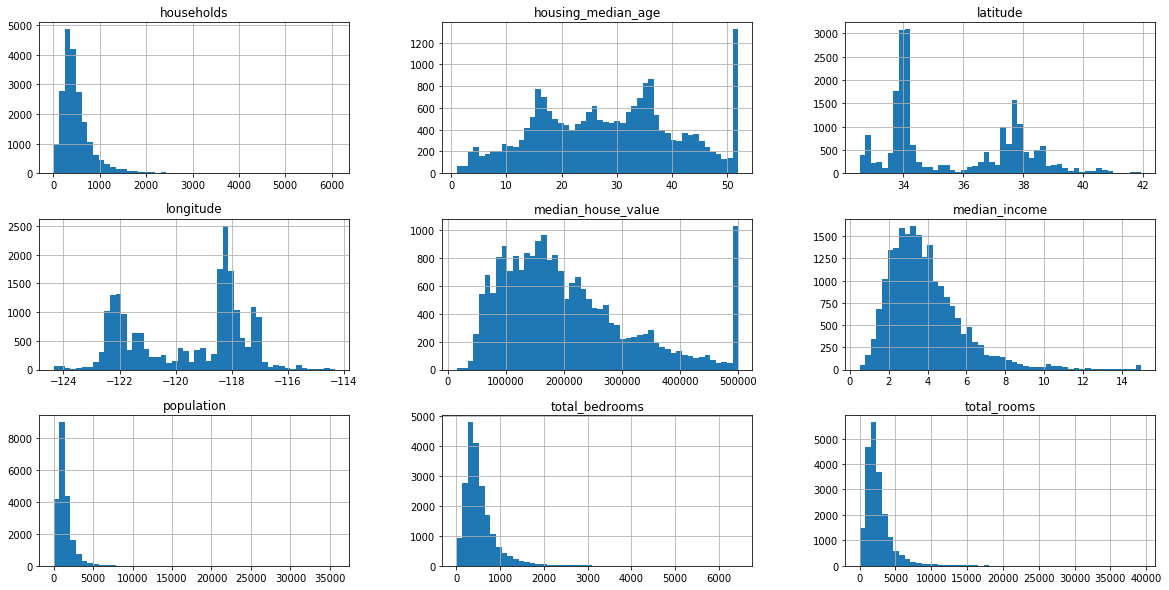

In [41]:
housing.hist(bins=50, figsize=(20,10))

## Set aside the test data

### local implementation...

In [54]:
import numpy as np

def split_test_train(data, test_ratio=0.2):
    N = len(data) # total dataset size
    shuffled_indices = np.random.permutation(N)
    M = int(N * test_ratio) # test dataset size
    return data.iloc[shuffled_indices[M:]], data.iloc[shuffled_indices[:M]]

np.random.seed(42)
train_set, test_set = split_test_train(housing)

In [55]:
(train_set.shape, test_set.shape)

((16512, 10), (4128, 10))

### using scikit learn...

In [56]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [57]:
(train_set.shape, test_set.shape)

((16512, 10), (4128, 10))

### stratified sampling by income...

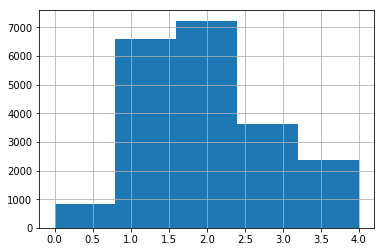

In [59]:
housing['income_cat'] = pd.cut(housing['median_income'], bins=[0, 1.5, 3.0, 4.5, 6, np.inf], labels=range(5))
housing['income_cat'].hist(bins=5)

In [71]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42).split(housing, housing['income_cat'])
for train_index, test_index in split:
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

TypeError: object of type 'CategoricalDtype' has no len()

In [69]:
?split._iter_indices

Signature: split._iter_indices(X, y, groups=None)
Docstring: Generate (train, test) indices
File:      ~/jupyter/jupyter_venv/lib/python3.6/site-packages/sklearn/model_selection/_split.py
Type:      method


## Exercises